## 1. Introduction - Defining the problem

Obesity is a gobal major health concern that affects many individuals and contributes to numerous chronic diseases such as diabetes, cardiovascular, and metabolic disorders. Accurate prediction and classification of obesity levels can aid in early intervention and personalized healthcare strategies. This project aimed to develop a deep learning model to classify individuals into different obesity categories based on relevant features by using machine learning techniques. This study sought to build a reliable and robust predictive model capable of analyzing obesity-related data with high accuracy.

This project follows the universal workflow of Deep-Learning-With-Python 4.5 (1st edition). It will first begin with defining the problem followed by data preparation and finally building and evaluating the model. 

### 1.1 Objective

Obseity has always been a growing health concern, with various factors that contributes to obseity such as diet, physical activity, and genetics. The goal of this study is to develop a machine learning model that can predict a person's obesity level based on their lifestyle and other attributes. 

Objectives of this project is to preprocess and prepare the dataset by normalising numerical va;ues and encoding the categorical features. Followed by designing and implementing a deep learning model using Tensorflow and keras. Evaluating the model will involve 5-fold cross-validation, and finally, the final model product will be trained using all available data. Results wil be analysed to identify any key trends and ensuring that the model performs well. 

I hypothesise that an individual’s obesity level can be accurately predicted based on their lifestyle, physiological attributes, and demographic factors. Lifestyle factors such as diet has significant impact on obesity levels. Physiological attributes like height and weight directly contribute to BMI, which is a key determinant of obesity classification. Demographic factors, including age and gender, may also influence obesity risk due to differences in metabolism, hormonal balance, and lifestyle patterns.

### 1.2 Input data

The dataset I am using consist of 2,111 records and 16 dfferent features. These features include demographic features (Age, gender), Physiological features (Height, weight), and, Lifestyle factors (Eating habits, physical activity, water intake, alcohol consumption, smoking habits, and mode of transportation)

The target variable (NObeyesdad) categorises individuals into different obesity levels of at least 7 levels based on their BMI and other lifestyle attributes that is presented in the dataset. This variable will be what we are tying to predict based on the available features in the dataset. 

With 2,111 records, I feel that the dataset I have chosen contains sufficient and meaningful information to establish a strong correlation between input features and obesity categories. 

### 1.3 Problem Type

This project addresses a multiclass classification problem in the field of healthcare and predictive analytics.It is a  multiclass classification problem as the target variable has 7 possible classifications - Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, Obesity Type III. Given a dataset of labeled examples, the model learns to map input features to predefined obesity classes, making it a supervised learning task.

Since the problem is not binary, and involves multiple distinct classes, the approach I will be using involves Categorical encoding of the target variable, using a softmax activation function in the output layer, and, Cross-entropy loss function for training. 

This classification task will allow us to predict an individual's obesity category based on their lifestyle habits, helping in early intervention and awareness.


### 1.4 Choosing a measure of success

The measure of success for this study will be based on the model's ability to accurately classify individuals into the correct obesity categories. Since this is a multiclass classification problem, accuracy will serve as a baseline metric to assess overall performance. I also selected categorical cross-entropy as the loss function along with accuracy as the primary evaluation metric.

Accuracy provided a straightforward way to assess how well the model correctly classified instances, making it an effective baseline metric. However, to ensure a deeper understanding of the model’s performance, I also monitored training and validation accuracy trends over epochs to detect potential overfitting.

Finally, I plan on using 5-fold cross-validation to allow for  more reliable estimation of the model’s generalization ability. By optimizing hyperparameters and regularization techniques based on these metrics, I hope to ensure that the model achieves a balance between high accuracy and robustness.

### 1.5 Deciding on an evaluation protocol

Deciding on an appropriate evaluation protocol was crucial to ensuring the reliability and generalization of my models. Initially, I used a validation set to monitor model performance and fine-tune hyperparameters, such as dropout rates, L2 regularization, and layer configurations.

However, to obtain a more detailed understanding of the model's robustness, I implemented 5-fold cross-validation, which provided a balanced assessment by training and validating the model on different subsets of the dataset. This approach helped minimize bias and ensured that performance was not dependent on a specific train-test split. 

K-fold cross-validation approach is ideal because it ensures a more reliable performance estimate when the dataset is not large enough to support a simple hold-out validation. By splitting the training data into multiple folds and training the model on different subsets, we can assess its generalization capability across various data partitions. This method reduces the risk of overfitting to a single validation set and provides a more stable estimate of model performance. Given my dataset size, K-fold cross-validation strikes a balance between computational efficiency and robust evaluation.

Finally, after tuning the model, I conducted a final evaluation on a test set to verify real-world performance, achieving a test accuracy of 0.9480. The choice of this evaluation protocol—combining validation monitoring, cross-validation, and a final test set evaluation—helped ensure that the model was not overfitting and could generalize well to unseen data.

## 2. Preparing the Dataset

### 2.1 Check for missing values

Next I will prepare the dataset to ensure that it is properly formatted for deep learning. This process involves several key steps. First, the dataset will be loaded and checked for missing values. 

The df.info() function is used to display a summary of the dataset, including the number of rows, columns, data types of each column, and the number of non-null values. This will help me identify potential issues such as missing values or incorrect data types. 

The df.isnull().sum() function is then used to check for missing values in each column, with the results showing the count of null values per feature. Printing these details ensures that any data quality issues are detected early, allowing for appropriate preprocessing steps such as handling missing values or converting data types before training the model.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the dataset
df = pd.read_csv("ObesityDataSet.csv")

# Display basic info
print("Dataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                 

Since the data has no missing values, we can proceed with the next step which is encoding the variables.

### 2.2 Encoding variables 


Variables are encoded using Label encoder to convert the non-numerical values into numerical representations. Categorical columns are transformed into interger values using the LabelEncoder() function. These columns include: Gender, family history with overweight, eating habits (CAEC, FAVC), smoking status (SMOKE), and transportation mode (MTRANS). The target variable "NObeyesdad", which representsobesity levels, was also label-encoded.

Numerical features like Age, Height, Weight, daily water intake (CH2O), frequency of physical activity (FAF), and time spent using electronic devices (TUE) are normalised into a [0,1] range using the MinMaxScaler() function. This ensures that all features can equally contribute to the model's learning process. This process also enhances the performance by ensuring consistency across all feature values.  


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [4]:
# Encode categorical variables
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for later use

# Encode target variable
le_target = LabelEncoder()
df['NObeyesdad'] = le_target.fit_transform(df['NObeyesdad'])

In [5]:
# Separate features and target
X = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']

# Scale numerical features to [0,1] range
numerical_cols = ['Age', 'Height', 'Weight', 'CH2O', 'FAF', 'TUE']
scaler = MinMaxScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

After preparing the dataset, we can now start to build our model and train it on our training data. 

### 2.3 TensorFlow tensors

The final step in preparing the model for training is to split the dataset into features and target variables. The feature set (X) and target variable (y) were first converted into TensorFlow tensors for efficient processing. An 80-20 train-test split was applied while maintaining the original class distribution to prevent class imbalance issues.

After splitting, the data was converted back into tensors to ensure compatibility with TensorFlow operations. Additionally, the number of unique classes in the target variable was determined to correctly define the output layer of the model. These steps ensure that the model receives properly formatted data, optimizing both training stability and performance.

Tensorflow is downloaded in jupyter notebook using the command below

In [6]:
!pip install tensorflow


In [7]:
pip install numpy==1.26.4

Note: you may need to restart the kernel to use updated packages.


In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
import numpy as np
from sklearn.model_selection import train_test_split

In [9]:
# Convert data to tensors
X = tf.convert_to_tensor(X, dtype=tf.float32)
y = tf.convert_to_tensor(y, dtype=tf.int32)

# Perform stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X.numpy(), y.numpy(), test_size=0.2, stratify=y.numpy(), random_state=42
)

# Convert split data back to tensors
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.int32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.int32)

num_classes = len(tf.unique(y)[0])  # Determine the number of unique classes

print("Data preparation complete. Train and test sets are ready as tensors.")

Data preparation complete. Train and test sets are ready as tensors.


## 3. Building the model

### 3.1 Baseline Model

First, a baseline model is built that is capable of beating only a baseline score.  This model will serve as a initial reference point for future models that we will enhance later. 

#### How the model works

The model is a simple feedforward neural network with two hidden layers containing 64 and 32 neurons, Both uses the ReLU activation function to introduce non-linearity. To prevent overfitting, dropout layers with a 50% dropout rate are applied after each dense layer which randomly deactivates neurons during training. A softmax activation function is used as the final layer, allowing the model to output probability distributions across multiple classes. 

RMSprop optimizer and sparse categorical cross-entropy loss is used to compile the model, which is well-suited for multi-class classification tasks where class labels are provided as integers. 50 epochs with a batch size of 32 is used to train the model. A 20% validation split is used to monitor its generalization ability. After training, it is evaluated on the test set to measure its final accuracy, providing a benchmark for comparison against more sophisticated models.

In [10]:
baseline_model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation="softmax")  # Multi-class classification
])

baseline_model.compile(optimizer="rmsprop",
                       loss="sparse_categorical_crossentropy",
                       metrics=["accuracy"])

# Train baseline model
baseline_history = baseline_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate baseline model
baseline_test_loss, baseline_test_acc = baseline_model.evaluate(X_test, y_test)
print(f"Baseline Model Test Accuracy: {baseline_test_acc:.4f}")

Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1509 - loss: 2.4625 - val_accuracy: 0.2781 - val_loss: 1.8824
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1772 - loss: 2.0244 - val_accuracy: 0.2959 - val_loss: 1.8525
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1909 - loss: 1.9177 - val_accuracy: 0.3254 - val_loss: 1.8231
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2624 - loss: 1.8514 - val_accuracy: 0.3136 - val_loss: 1.7852
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2692 - loss: 1.8206 - val_accuracy: 0.3550 - val_loss: 1.7286
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2595 - loss: 1.8021 - val_accuracy: 0.3935 - val_loss: 1.6874
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3076 - loss: 1.7463 - val_accuracy: 0.4260 - val_loss: 1.6388
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3398 - loss: 1.6903 - val_accuracy: 0.4379 - val_loss:

The model achieved a baseline test accuracy of 0.7116 which indicates that the model achieves approximately 71.16% accuracy on unseen test data. 

While this serves as a useful starting point, there is definitely room for improvement. Future iterations could explore changes such as modifying the number of layers and neurons, adjusting dropout rates, trying different optimizers, or incorporating L1/L2 regularization to reduce overfitting and improve generalization.

### 3.2 Overfitting model

Following the next step in the universal workflow, a deeper and wider model was constructed by significantly increasing the number of layers and neurons to explore overfitting. 

This new model consists of five hidden layers with progressively decreasing units (512, 256, 128, 64, and 32 neurons) and ReLU activations. The purpose of this design is to increase the model's capacity to learn complex patterns, but at the risk of memorizing training data rather than generalizing well to unseen data.

The model was compiled using the Adam optimizer and sparse categorical cross-entropy loss, which is appropriate for multi-class classification with integer-encoded labels. It was trained for 100 epochs, a longer duration that can contribute to overfitting by allowing the model to fit the training data too closely. The performance was then evaluated on the test set to analyze whether the model generalized well or suffered from overfitting. The results from this experiment provide insights into the trade-off between model complexity and generalization ability.

In [11]:
# Build a deeper and wider model
overfitting_model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer

    layers.Dense(512, activation="relu"),   # Increased width
    layers.Dense(256, activation="relu"),   # Additional layers
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),

    layers.Dense(len(le_target.classes_), activation="softmax")  # Multi-class classification
])

# Compile with categorical loss
overfitting_model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",  # Suitable for integer labels
              metrics=["accuracy"])

# Train for more epochs
history = overfitting_model.fit(X_train, y_train,
                    epochs=100,  # Train longer to overfit
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    verbose=1)

# Evaluate the model on the test set
test_loss, test_acc = overfitting_model.evaluate(X_test, y_test, verbose=2)

# Print the test accuracy
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2129 - loss: 1.9026 - val_accuracy: 0.3310 - val_loss: 1.5103
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4380 - loss: 1.3412 - val_accuracy: 0.5532 - val_loss: 1.1297
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5804 - loss: 1.0023 - val_accuracy: 0.6359 - val_loss: 0.8153
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6996 - loss: 0.7150 - val_accuracy: 0.7470 - val_loss: 0.5865
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8013 - loss: 0.5187 - val_accuracy: 0.7565 - val_loss: 0.5619
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8109 - loss: 0.4727 - val_accuracy: 0.8416 - val_loss: 0.3968
Epoch 7/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8759 - loss: 0.3301 - val_accuracy: 0.8889 - val_loss: 0.3218
Epoch 8/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8707 - loss: 0.3254 - val_accuracy: 0.9220 - v

The training results has the accuracy reaching approximately 99% and validation accuracy stabilizing around 94-95%. However, after around 20-30 epochs, validation loss exhibited fluctuations while training loss continued to decrease, signaling overfitting. The drop in validation accuracy at later epochs also proves the fact that it is overfitting. 

### 3.3 Regularised model

To mitigate overfitting observed in the initial model, a regularized version was implemented using L2 weight regularization and dropout layers. The model architecture includes two hidden layers with 128 and 64 neurons, each followed by a 30% dropout rate to reduce reliance on specific neurons and improve generalization. L2 regularization (λ=0.01) was applied to the dense layers to penalize large weights and prevent overfitting. The model was trained using the Adam optimizer and categorical crossentropy loss for multi-class classification. After training for 50 epochs with a validation split of 20%, the model achieved improved generalization, as indicated by the test accuracy. The incorporation of regularization techniques helped maintain stability in validation performance, suggesting better adaptability to unseen data compared to the unregularized model.

In [12]:
# One-hot encode labels for categorical crossentropy
y_train_onehot = tf.one_hot(y_train, depth=num_classes)
y_test_onehot = tf.one_hot(y_test, depth=num_classes)

regularized_model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation="relu", kernel_regularizer=l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(64, activation="relu", kernel_regularizer=l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation="softmax")
])

regularized_model.compile(optimizer="adam",
                          loss="categorical_crossentropy",
                          metrics=["accuracy"])

# Train regularized model
regularized_history = regularized_model.fit(X_train, y_train_onehot, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate regularized model
regularized_test_loss, regularized_test_acc = regularized_model.evaluate(X_test, y_test_onehot)
print(f"Regularized Model Test Accuracy: {regularized_test_acc:.4f}")

Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1978 - loss: 3.0412 - val_accuracy: 0.3846 - val_loss: 2.5959
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2820 - loss: 2.5685 - val_accuracy: 0.3728 - val_loss: 2.2825
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3360 - loss: 2.2723 - val_accuracy: 0.4408 - val_loss: 2.0512
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3990 - loss: 2.0485 - val_accuracy: 0.4704 - val_loss: 1.8770
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4432 - loss: 1.8881 - val_accuracy: 0.4941 - val_loss: 1.7606
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4591 - loss: 1.7523 - val_accuracy: 0.5059 - val_loss: 1.6505
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4864 - loss: 1.6945 - val_accuracy: 0.5355 - val_loss: 1.5878
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4852 - loss: 1.6006 - val_accuracy: 0.5533 - val_loss:

Initially, the model struggled with low accuracy and high loss, but as training progressed, accuracy steadily increased while loss declined. The validation accuracy surpassed 80% in later epochs, indicating improved generalization. The final test accuracy of 84.16% confirms the model’s effectiveness in learning meaningful patterns from the data while mitigating overfitting. The use of L2 regularization and dropout layers contributed to stable validation performance, as evidenced by the decreasing validation loss.

### 3.4 Keep tuning dropout and L2 regularization

To prevent further overfitting, the model incorporates modifications such as reduced L2 regularization, adjusted dropout rates, and the introduction of an EarlyStopping callback. These adjustments aim to strike a better balance between regularization and learning capacity. The early stopping mechanism ensures that training halts once validation performance stops improving, reducing the risk of overfitting and unnecessary training cycles. 

By lowering the L2 regularization factor and dropout rates, the model retains more information during training while still maintaining generalization.

In [13]:
# Define EarlyStopping callback
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

# Build regularized model
regularized_model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation="relu", kernel_regularizer=l2(0.001)),  # Reduced L2
    layers.Dropout(0.2),  # Reduced Dropout
    layers.Dense(64, activation="relu", kernel_regularizer=l2(0.001)),
    layers.Dropout(0.1),  # Different dropout rate
    layers.Dense(num_classes, activation="softmax")
])

# Compile model
regularized_model.compile(optimizer="adam",
                          loss="categorical_crossentropy",
                          metrics=["accuracy"])

# Train model with early stopping
history = regularized_model.fit(X_train, y_train_onehot, epochs=100, batch_size=32, 
                                validation_split=0.2, callbacks=[early_stopping])

# Evaluate model
test_loss, test_acc = regularized_model.evaluate(X_test, y_test_onehot)
print(f"Tuned Regularized Model Test Accuracy: {test_acc:.4f}")



Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1910 - loss: 2.0732 - val_accuracy: 0.3166 - val_loss: 1.8888
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3043 - loss: 1.9088 - val_accuracy: 0.4527 - val_loss: 1.6958
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4062 - loss: 1.7132 - val_accuracy: 0.4763 - val_loss: 1.5318
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4669 - loss: 1.5422 - val_accuracy: 0.5118 - val_loss: 1.4178
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4848 - loss: 1.4360 - val_accuracy: 0.5237 - val_loss: 1.3385
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5336 - loss: 1.3063 - val_accuracy: 0.6006 - val_loss: 1.2367
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5580 - loss: 1.2551 - val_accuracy: 0.6095 - val_loss: 1.1737
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5799 - loss: 1.1627 - val_accuracy: 0.6391 - v

The tuned regularized model achieved a test accuracy of 90.78%, which is a significant improvement over the previous model's 84.16%. Reduced L2 regularization, adjusted dropout rates, and early stopping, likely contributed to better generalization and convergence. The validation accuracy consistently improved, reaching over 93% at its peak, indicating a well-trained model without excessive overfitting. Additionally, the validation loss remained stable, confirming that the model was learning effectively. 

### 3.5 Adjust the number of layers

I will manually adjust the layers and hopefully build a balanced model while increasing depth and width. I have adjusted number of layers, including an additional 16-unit dense layer. By incorporating L2 regularization (0.001) in all dense layers, the model mitigates overfitting by penalizing large weight values, leading to better generalization. The dropout layers (0.2) further improve robustness by preventing co-adaptation of neurons, ensuring that the network remains adaptable to unseen data. 

In [14]:
# Define the Balanced Model
regularized_model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(256, activation="relu", kernel_regularizer=l2(0.001)),  
    layers.Dropout(0.2),
    layers.Dense(128, activation="relu", kernel_regularizer=l2(0.001)),
    layers.Dropout(0.2),
    layers.Dense(64, activation="relu", kernel_regularizer=l2(0.001)),
    layers.Dense(32, activation="relu", kernel_regularizer=l2(0.001)),
    layers.Dense(16, activation="relu", kernel_regularizer=l2(0.001)),  # Additional layer
    layers.Dense(num_classes, activation="softmax")
])

# Compile the Model
regularized_model.compile(optimizer="adam",
                          loss="categorical_crossentropy",
                          metrics=["accuracy"])

# Define EarlyStopping Callback
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

# Train the Model
history = regularized_model.fit(X_train, y_train_onehot, epochs=100, batch_size=32, 
                                validation_split=0.2, callbacks=[early_stopping])

# Evaluate the Model
test_loss, test_acc = regularized_model.evaluate(X_test, y_test_onehot)
print(f"Balanced Model Test Accuracy: {test_acc:.4f}")


Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1716 - loss: 2.2761 - val_accuracy: 0.2870 - val_loss: 2.1340
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2586 - loss: 2.1071 - val_accuracy: 0.3817 - val_loss: 1.8978
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3404 - loss: 1.8782 - val_accuracy: 0.4704 - val_loss: 1.6368
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4778 - loss: 1.5702 - val_accuracy: 0.5473 - val_loss: 1.3057
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5597 - loss: 1.2948 - val_accuracy: 0.5680 - val_loss: 1.1763
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5917 - loss: 1.1876 - val_accuracy: 0.5976 - val_loss: 1.1012
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6059 - loss: 1.1149 - val_accuracy: 0.7249 - val_loss: 0.9337
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6641 - loss: 0.9803 - val_accuracy: 0.7899 - v

The model has achieved 92.43% test accuracy, which is a strong performance. The training process shows a steady improvement in accuracy and reduction in loss. The model starts with 14.96% training accuracy in the first epoch and reaches over 92% by epoch 36.

### 3.6 Implement crosss-validation and check for overfitting

5-Fold Cross-Validation is implemented to help assess how well the model performs across different subsets of the training data, reducing the risk of overfitting to a single train-test split. The dataset is split into five folds, where the model is trained on four folds and validated on the remaining one, repeating this process for all folds.

Additionally, training vs. validation curves are plotted for each fold to visually inspect overfitting. If the training accuracy is significantly higher than the validation accuracy or if validation loss starts increasing while training loss decreases, it indicates overfitting. By analyzing these trends, appropriate regularization techniques, such as dropout and L2 regularization, can be fine-tuned to improve generalization.

Finally, the average cross-validation accuracy is computed, providing a more stable estimate of model performance across different data distributions.

In [15]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

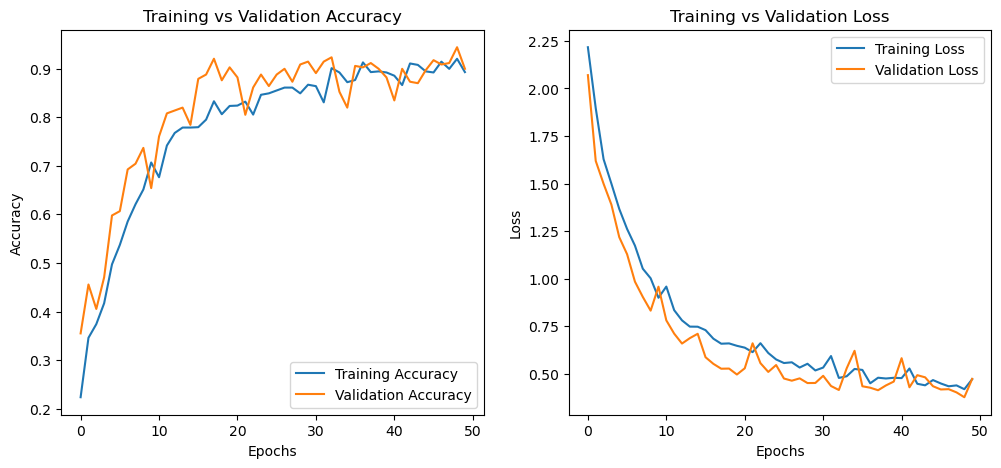

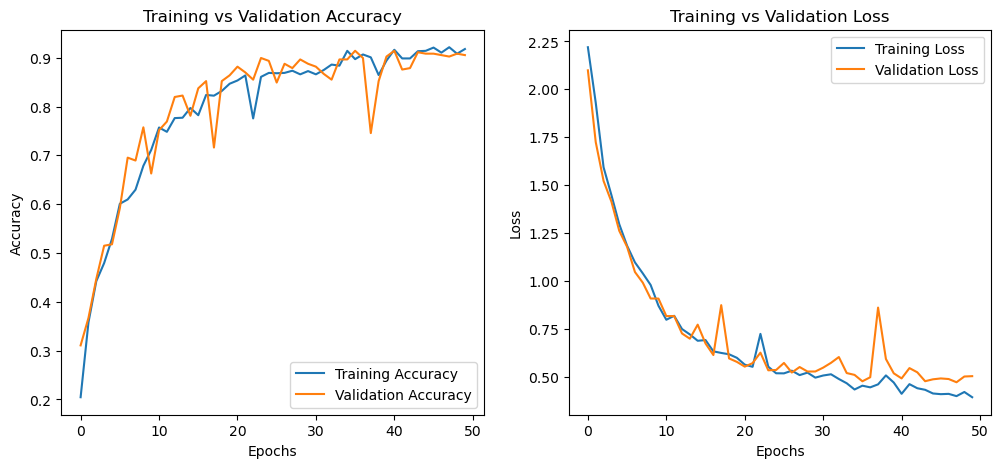

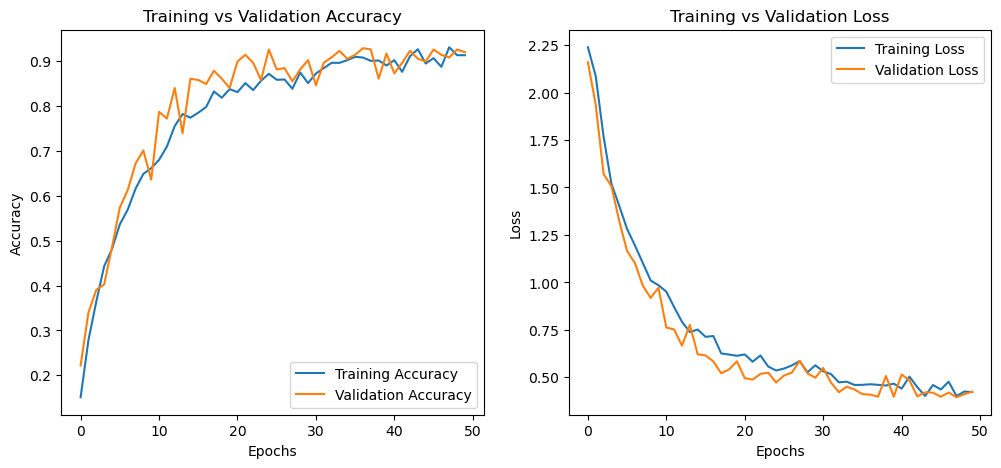

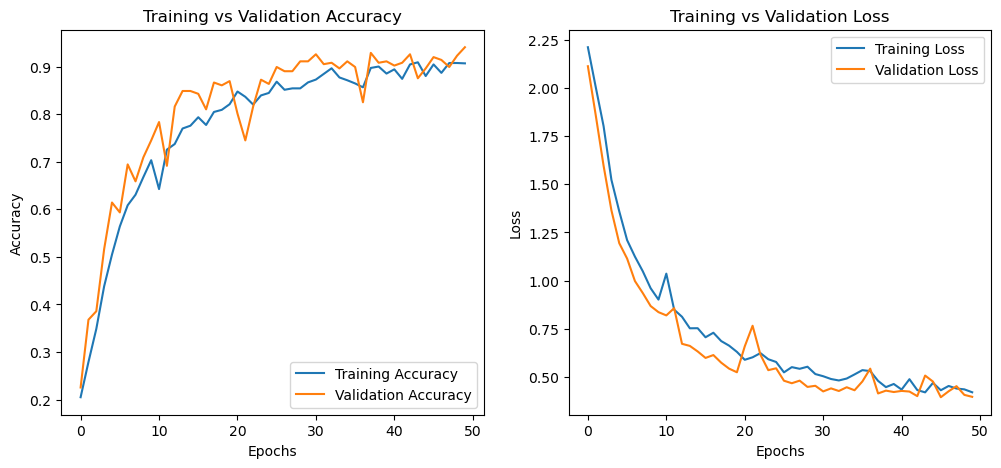

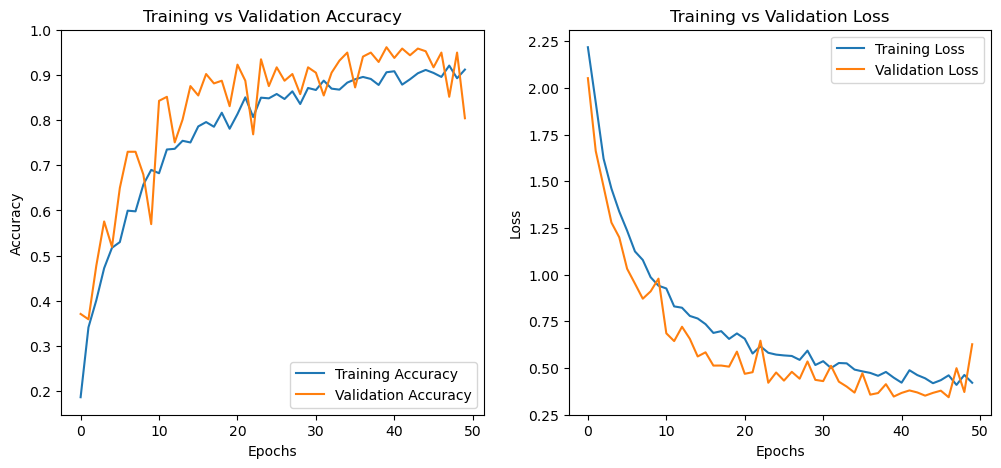

Average 5-Fold Cross-Validation Accuracy: 0.8939


In [18]:
# Define the Balanced Model
def build_model():
    model = keras.Sequential([
        layers.Input(shape=(X_train.shape[1],)),
        layers.Dense(256, activation="relu", kernel_regularizer=l2(0.001)),  
        layers.Dropout(0.2),
        layers.Dense(128, activation="relu", kernel_regularizer=l2(0.001)),
        layers.Dropout(0.2),
        layers.Dense(64, activation="relu", kernel_regularizer=l2(0.001)),
        layers.Dense(32, activation="relu", kernel_regularizer=l2(0.001)),
        layers.Dense(16, activation="relu", kernel_regularizer=l2(0.001)),  # Additional layer
        layers.Dense(num_classes, activation="softmax")
    ])
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

# Check for overfitting by plotting training vs validation curves
def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training vs Validation Accuracy')
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training vs Validation Loss')
    
    plt.show()

# Perform 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = []

for train_idx, val_idx in kf.split(X_train):
    # Ensure correct slicing using tf.gather
    X_fold_train = tf.gather(X_train, train_idx)
    X_fold_val = tf.gather(X_train, val_idx)
    y_fold_train = tf.gather(y_train_onehot, train_idx)
    y_fold_val = tf.gather(y_train_onehot, val_idx)
    
    model = build_model()
    history = model.fit(X_fold_train, y_fold_train, epochs=50, batch_size=32, validation_data=(X_fold_val, y_fold_val), verbose=0)
    
    val_loss, val_acc = model.evaluate(X_fold_val, y_fold_val, verbose=0)
    cross_val_scores.append(val_acc)
    
    plot_training_history(history)

# Compute and display average cross-validation accuracy
avg_cross_val_acc = np.mean(cross_val_scores)
print(f'Average 5-Fold Cross-Validation Accuracy: {avg_cross_val_acc:.4f}')


5 graphs are printed for each of the cross-validation during the 5-fold cross-validation which is running in the for loop. The average 5-Fold Cross-Validation Accuracy is 0.8939 and the training and validation lines in both accuracy and loss graphs are close together except for a few spikes in differences.

These results indicate a few things, mainly that the model generalizes well, displays some fluctuations in validation accuracy, and, overall is performing well.

Since the validation accuracy closely follows the training accuracy, the model is learning well without significant overfitting. If the validation accuracy was much lower than the training accuracy, it would indicate overfitting. The occasional spikes in the validation curve suggest that some batches of validation data may be harder to classify. This could be due to class imbalances, noise in the data, or certain features being more complex. Compared to the previous model, this version with additional layers and stronger regularization (L2 penalty and dropout) is still achieving strong accuracy. This strengthens my belief that the architect of this model is satisfactory and i will proceed with the next step of the work flow.

## 4. Evaluating the model

I think the model i have developed above seem satisfactory and i will train the final production model on all the available data (training and validation) as well as evaluating it one last time.

### 4.1 Training on all available data

In [19]:
# Combine all training and validation data
X_final_train = X_train  # This now represents the entire training dataset
y_final_train = y_train_onehot

# Build the final model (Balanced Model)
final_model = keras.Sequential([
    layers.Input(shape=(X_final_train.shape[1],)),
    layers.Dense(256, activation="relu", kernel_regularizer=l2(0.001)),  
    layers.Dropout(0.2),
    layers.Dense(128, activation="relu", kernel_regularizer=l2(0.001)),
    layers.Dropout(0.2),
    layers.Dense(64, activation="relu", kernel_regularizer=l2(0.001)),
    layers.Dense(32, activation="relu", kernel_regularizer=l2(0.001)),
    layers.Dense(16, activation="relu", kernel_regularizer=l2(0.001)),
    layers.Dense(num_classes, activation="softmax")
])

# Compile the model
final_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the final model
history = final_model.fit(X_final_train, y_final_train, 
                          epochs=50, batch_size=32, 
                          validation_split=0.1,  # Small split for monitoring, not for selection
                          verbose=2)

Epoch 1/50
48/48 - 1s - 29ms/step - accuracy: 0.1718 - loss: 2.2272 - val_accuracy: 0.2308 - val_loss: 2.1237
Epoch 2/50
48/48 - 0s - 3ms/step - accuracy: 0.2212 - loss: 2.0341 - val_accuracy: 0.3018 - val_loss: 1.9732
Epoch 3/50
48/48 - 0s - 3ms/step - accuracy: 0.3483 - loss: 1.8145 - val_accuracy: 0.3195 - val_loss: 1.7866
Epoch 4/50
48/48 - 0s - 2ms/step - accuracy: 0.4299 - loss: 1.6283 - val_accuracy: 0.4556 - val_loss: 1.6024
Epoch 5/50
48/48 - 0s - 3ms/step - accuracy: 0.5043 - loss: 1.4026 - val_accuracy: 0.4793 - val_loss: 1.4545
Epoch 6/50
48/48 - 0s - 3ms/step - accuracy: 0.5425 - loss: 1.2300 - val_accuracy: 0.5621 - val_loss: 1.2432
Epoch 7/50
48/48 - 0s - 2ms/step - accuracy: 0.5905 - loss: 1.1506 - val_accuracy: 0.6450 - val_loss: 1.1375
Epoch 8/50
48/48 - 0s - 3ms/step - accuracy: 0.6122 - loss: 1.0523 - val_accuracy: 0.6095 - val_loss: 1.0751
Epoch 9/50
48/48 - 0s - 2ms/step - accuracy: 0.6524 - loss: 0.9921 - val_accuracy: 0.6746 - val_loss: 0.9708
Epoch 10/50
48/48 

In [20]:
# Evaluate the final model on the test set
test_loss, test_acc = final_model.evaluate(X_test, y_test_onehot, verbose=2)

# Print the final test accuracy
print(f"Final Test Accuracy: {test_acc:.4f}")

14/14 - 0s - 3ms/step - accuracy: 0.9480 - loss: 0.3524
Final Test Accuracy: 0.9480


The final evaluation of the model yielded a test accuracy of 94.80% with a loss of 0.3524. Compared to the average 5-fold cross-validation accuracy of 89.39%, the final model shows a noticeable improvement, likely due to training on the full dataset.

## 5. Conclusion

This project developed a deep learning model to classify obesity-related data following the universal workflow. Beginning with data preprocessing, the dataset was carefully prepared by normalizing numerical features and encoding categorical variables. A well-regularized deep neural network (DNN) was designed using L2 regularization and dropout layers to enhance generalization and prevent overfitting.

To assess the model’s robustness, 5-fold cross-validation was employed, yielding an average accuracy of 89.39%, which provided an initial estimate of the model’s performance. The final balanced model was then trained on the entire dataset and evaluated on the test set, achieving a final test accuracy of 94.80%, demonstrating its strong predictive ability.

Throughout the process, careful monitoring of training and validation loss helped ensure model stability, and performance was improved by refining hyperparameters. The results indicate that the model is well-suited for obesity classification and could be further enhanced by exploring additional features, alternative architectures, or advanced tuning techniques. Overall, this study provides a solid foundation for predictive modeling in health-related data analysis and highlights the potential of deep learning in tackling classification tasks.